# Milling Temperature Prediction Using Machine Learning

## 1. Case Understanding
In this project, there will be created a machine learning model which can substitute temperature sensor to do observation cutter temperature. This machine learning model works by predict cutter temperature value based on input features, such cutter initial temperature, machine spindle speed, machine feed rate, and machine axial depth of cut. From those features, there are several features called as machining parameters, there are spindle speed, feed rate, and axial depth of cut. 

## 2. Data Extraction
In this section, data will be extracted from excel type into dataframe in notebook using pandas library.

In [1]:
# Define libraries needed
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set()

In [2]:
# Extract excel file into dataframe
df = pd.read_excel('DATA TA PERCOBAAN 3.xlsx')
df

,To,Spindle Speed (RPM),Feed Rate (mm/min),Depth of Cut (mm),Time (s),T Output
0,24.8,800,50,3,1,24.8
1,24.8,800,50,3,2,26.6
2,24.8,800,50,3,3,26.6
3,24.8,800,50,3,4,26.6
4,24.8,800,50,3,5,26.6
...,...,...,...,...,...,...
1511,22.1,1600,400,10,13,42.9
1512,22.1,1600,400,10,14,42.9
1513,22.1,1600,400,10,15,42.9
1514,22.1,1600,400,10,16,42.9


In [3]:
# Take a look dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516 entries, 0 to 1515
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   To                   1516 non-null   float64
 1   Spindle Speed (RPM)  1516 non-null   int64  
 2   Feed Rate (mm/min)   1516 non-null   int64  
 3   Depth of Cut (mm)    1516 non-null   int64  
 4   Time (s)             1516 non-null   int64  
 5   T Output             1516 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 71.2 KB


## 3. Exploratory Data Analysis

In this section, dataset will be explored using seaborn, matplotlib, etc to get detail characteristic of data.

In [3]:
# Copy dataframe
df_EDA = df.copy()

### Visualize relation both machining parameters with cutter temperature

Visualization done by using data from both machining parameters with graph during observation time.

- **Relation between spindle speed with cutter temperature**

In [8]:
RPM_800 = df_EDA[df_EDA['Spindle Speed (RPM)'] == 800]
RPM_1000 = df_EDA[df_EDA['Spindle Speed (RPM)'] == 1000]
RPM_1600 = df_EDA[df_EDA['Spindle Speed (RPM)'] == 1600]

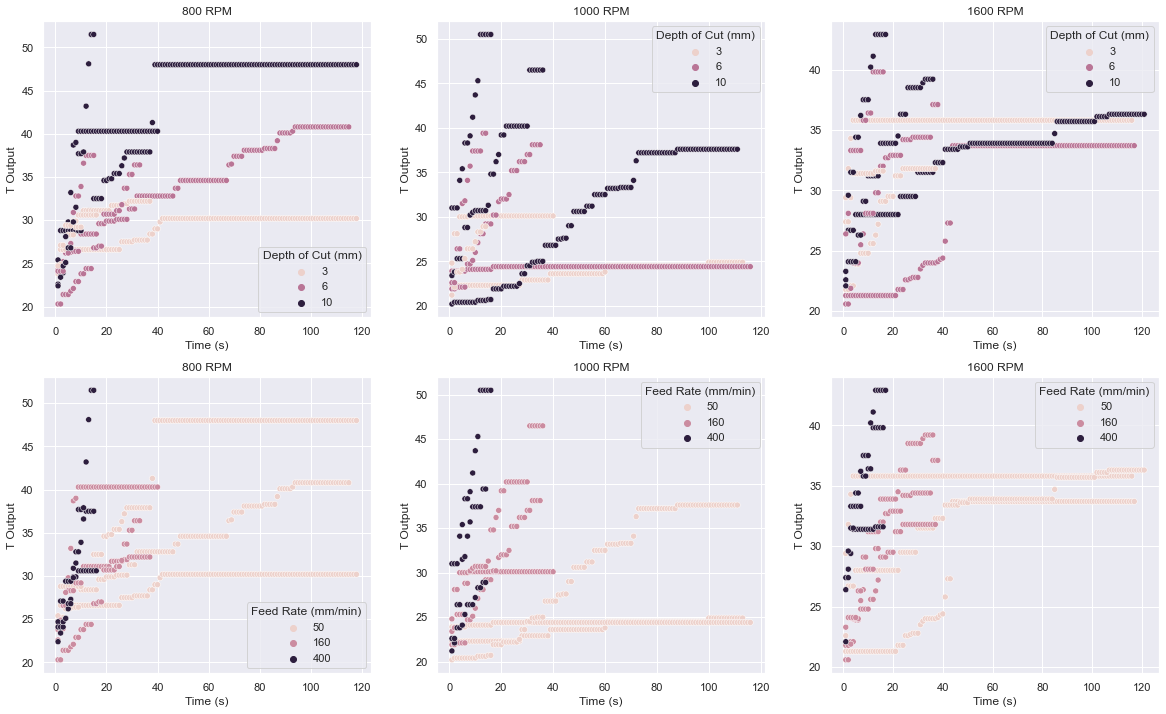

In [9]:
fig, axes = plt.subplots(2,3,figsize=(20,12))


ax1 = sns.scatterplot(data=RPM_800, x='Time (s)', y='T Output', hue='Depth of Cut (mm)', ax=axes[0,0])
ax2 = sns.scatterplot(data=RPM_1000, x='Time (s)', y='T Output', hue='Depth of Cut (mm)', ax=axes[0,1])
ax3 = sns.scatterplot(data=RPM_1600, x='Time (s)', y='T Output', hue='Depth of Cut (mm)', ax=axes[0,2])

ax4 = sns.scatterplot(data=RPM_800, x='Time (s)', y='T Output', hue='Feed Rate (mm/min)', ax=axes[1,0])
ax5 = sns.scatterplot(data=RPM_1000, x='Time (s)', y='T Output', hue='Feed Rate (mm/min)', ax=axes[1,1])
ax6 = sns.scatterplot(data=RPM_1600, x='Time (s)', y='T Output', hue='Feed Rate (mm/min)', ax=axes[1,2])


ax1.title.set_text('800 RPM')
ax2.title.set_text('1000 RPM')
ax3.title.set_text('1600 RPM')
ax4.title.set_text('800 RPM')
ax5.title.set_text('1000 RPM')
ax6.title.set_text('1600 RPM')

From graphs above, we can see there are positive relationship between spindle speed and cutter temperature.

- **Relation between feed rate and cutter temperature**

In [10]:
FR_50 = df_EDA[df_EDA['Feed Rate (mm/min)'] == 50]
FR_160 = df_EDA[df_EDA['Feed Rate (mm/min)'] == 160]
FR_400 = df_EDA[df_EDA['Feed Rate (mm/min)'] == 400]

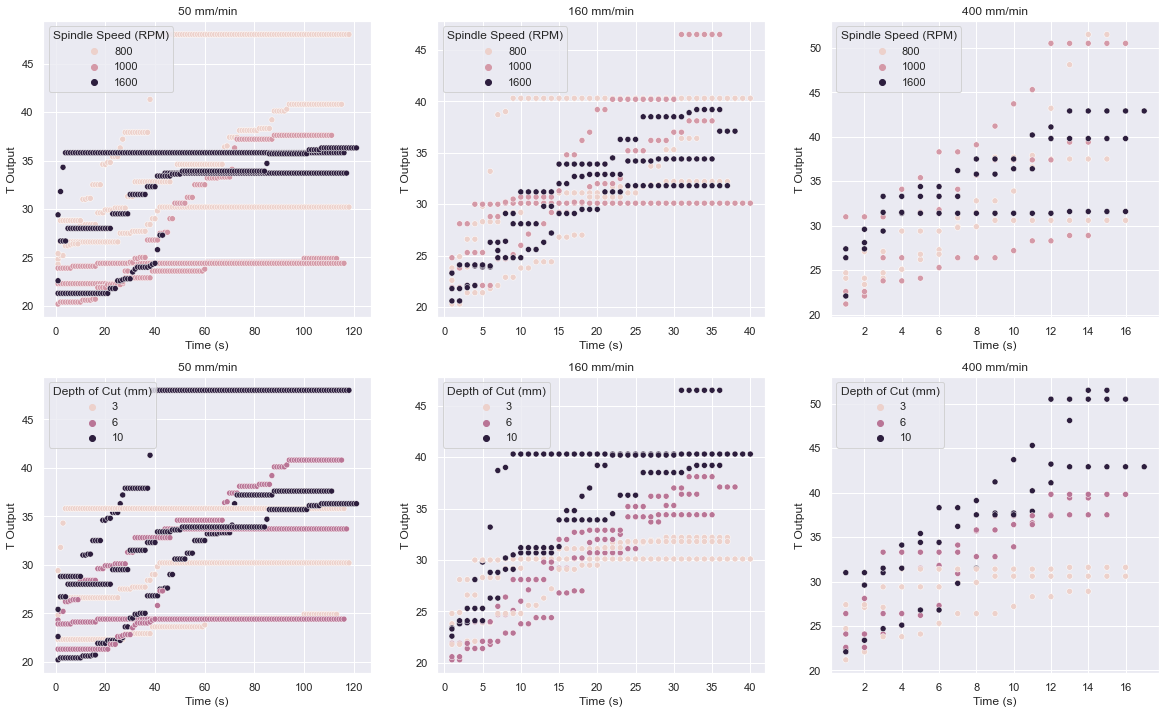

In [11]:
fig, axes = plt.subplots(2,3,figsize=(20,12))

sns.set()
ax1 = sns.scatterplot(data=FR_50, x='Time (s)', y='T Output', hue='Spindle Speed (RPM)',ax=axes[0,0])
ax2 = sns.scatterplot(data=FR_160, x='Time (s)', y='T Output', hue='Spindle Speed (RPM)', ax=axes[0,1])
ax3 = sns.scatterplot(data=FR_400, x='Time (s)', y='T Output', hue='Spindle Speed (RPM)', ax=axes[0,2])

ax4 = sns.scatterplot(data=FR_50, x='Time (s)', y='T Output', hue='Depth of Cut (mm)',ax=axes[1,0])
ax5 = sns.scatterplot(data=FR_160, x='Time (s)', y='T Output', hue='Depth of Cut (mm)', ax=axes[1,1])
ax6 = sns.scatterplot(data=FR_400, x='Time (s)', y='T Output', hue='Depth of Cut (mm)', ax=axes[1,2])

ax1.title.set_text('50 mm/min')
ax2.title.set_text('160 mm/min')
ax3.title.set_text('400 mm/min')
ax4.title.set_text('50 mm/min')
ax5.title.set_text('160 mm/min')
ax6.title.set_text('400 mm/min')

From graphs above, we also can know there are positive relationship between feed rate and cutter temperature.

- **Relation between axial depth of cut and cutter temperature**

In [12]:
DOC_3 = df_EDA[df_EDA['Depth of Cut (mm)'] == 3]
DOC_6 = df_EDA[df_EDA['Depth of Cut (mm)'] == 6]
DOC_10 = df_EDA[df_EDA['Depth of Cut (mm)'] == 10]

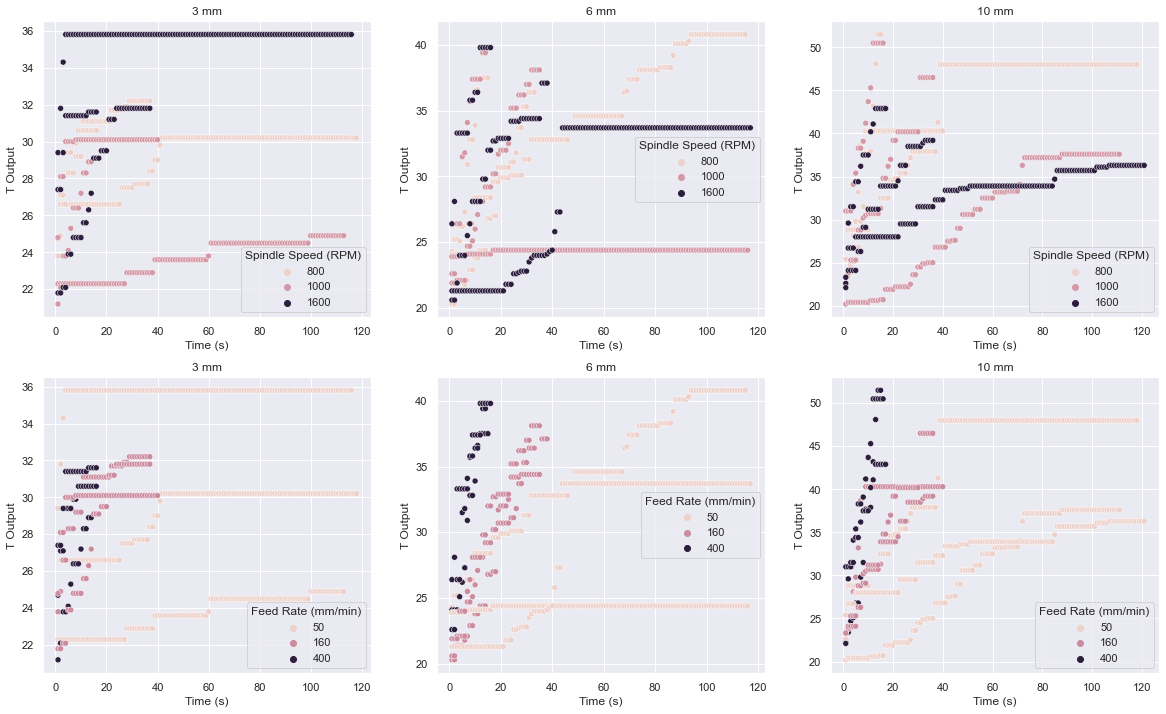

In [13]:
fig, axes = plt.subplots(2,3,figsize=(20,12))

sns.set()
ax1 = sns.scatterplot(data=DOC_3, x='Time (s)', y='T Output', hue='Spindle Speed (RPM)',ax=axes[0,0])
ax2 = sns.scatterplot(data=DOC_6, x='Time (s)', y='T Output', hue='Spindle Speed (RPM)', ax=axes[0,1])
ax3 = sns.scatterplot(data=DOC_10, x='Time (s)', y='T Output', hue='Spindle Speed (RPM)', ax=axes[0,2])

ax4 = sns.scatterplot(data=DOC_3, x='Time (s)', y='T Output', hue='Feed Rate (mm/min)',ax=axes[1,0])
ax5 = sns.scatterplot(data=DOC_6, x='Time (s)', y='T Output', hue='Feed Rate (mm/min)', ax=axes[1,1])
ax6 = sns.scatterplot(data=DOC_10, x='Time (s)', y='T Output', hue='Feed Rate (mm/min)', ax=axes[1,2])

ax1.title.set_text('3 mm')
ax2.title.set_text('6 mm')
ax3.title.set_text('10 mm')
ax4.title.set_text('3 mm')
ax5.title.set_text('6 mm')
ax6.title.set_text('10 mm')

From graphs above, we also can know there are positive relationship between axial depth of cut and cutter temperature.

## 4. Pembuatan Model

In [6]:
# Copy dataframe
df_final = df_EDA.copy()

In [7]:
# Define libraries used to create model
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost
import lightgbm
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [8]:
# Separate input and target feature
X = df_final.drop(['T Output'], axis=1)
y = df_final['T Output']

In [9]:
# Separate training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [14]:
# Creating model
algorithms = [LinearRegression, DecisionTreeRegressor, RandomForestRegressor, KNeighborsRegressor, XGBRegressor, LGBMRegressor]
algorithms_name = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'K Neighbors Regressor', 'XGB Regressor', 'LGBM Regressor']
error_type = ['Mean Absolute Error', 'Root Mean Squared Error', 'R Squared']


cross_validation = KFold(n_splits=10, shuffle=True)
# cross validation for mean absolute error
CV_MAE = []
for i in algorithms :
    model_MAE = i()
    model_MAE.fit(X_train, y_train)
    prediction = model_MAE.predict(X_test)
    model_CV_MAE = np.abs(cross_val_score(model_MAE,X,y,cv=cross_validation,scoring='neg_mean_absolute_error'))
    CV_MAE.append(np.round(model_CV_MAE.mean(), decimals=2))
    
    
# cross validation for root mean squared error
CV_RMSE = []
for b in algorithms :
    model_RMSE = b()
    model_RMSE.fit(X_train, y_train)
    prediction = model_RMSE.predict(X_test)
    model_CV_RMSE = np.abs(cross_val_score(model_RMSE,X,y,cv=cross_validation,scoring='neg_root_mean_squared_error'))
    CV_RMSE.append(np.round(model_CV_RMSE.mean(), decimals=2))
    
# cross validation for R squared
CV_R_squared = []
for c in algorithms :
    model_R = c()
    model_R.fit(X_train, y_train)
    prediction = model_R.predict(X_test)
    model_CV_R = np.abs(cross_val_score(model_R,X,y,cv=cross_validation,scoring='r2'))
    CV_R_squared.append(np.round(model_CV_R.mean(), decimals=3))
    
df_CV = pd.DataFrame({
    'Algorithms' : algorithms_name,
    'Mean Absolute Error' : CV_MAE,
    'Root Mean Squared Error' : CV_RMSE,
    'R Squared' : CV_R_squared
})

In [15]:
df_CV

,Algorithms,Mean Absolute Error,Root Mean Squared Error,R Squared
0,Linear Regression,3.80,4.76,0.507
1,Decision Tree Regressor,0.26,0.86,0.984
2,Random Forest Regressor,0.28,0.69,0.989
3,K Neighbors Regressor,0.39,0.95,0.981
4,XGB Regressor,0.34,0.71,0.989
5,LGBM Regressor,0.49,1.02,0.979


Based on statistic error from all models, we can know that **random forest regressor** is the best model with lowest error values.

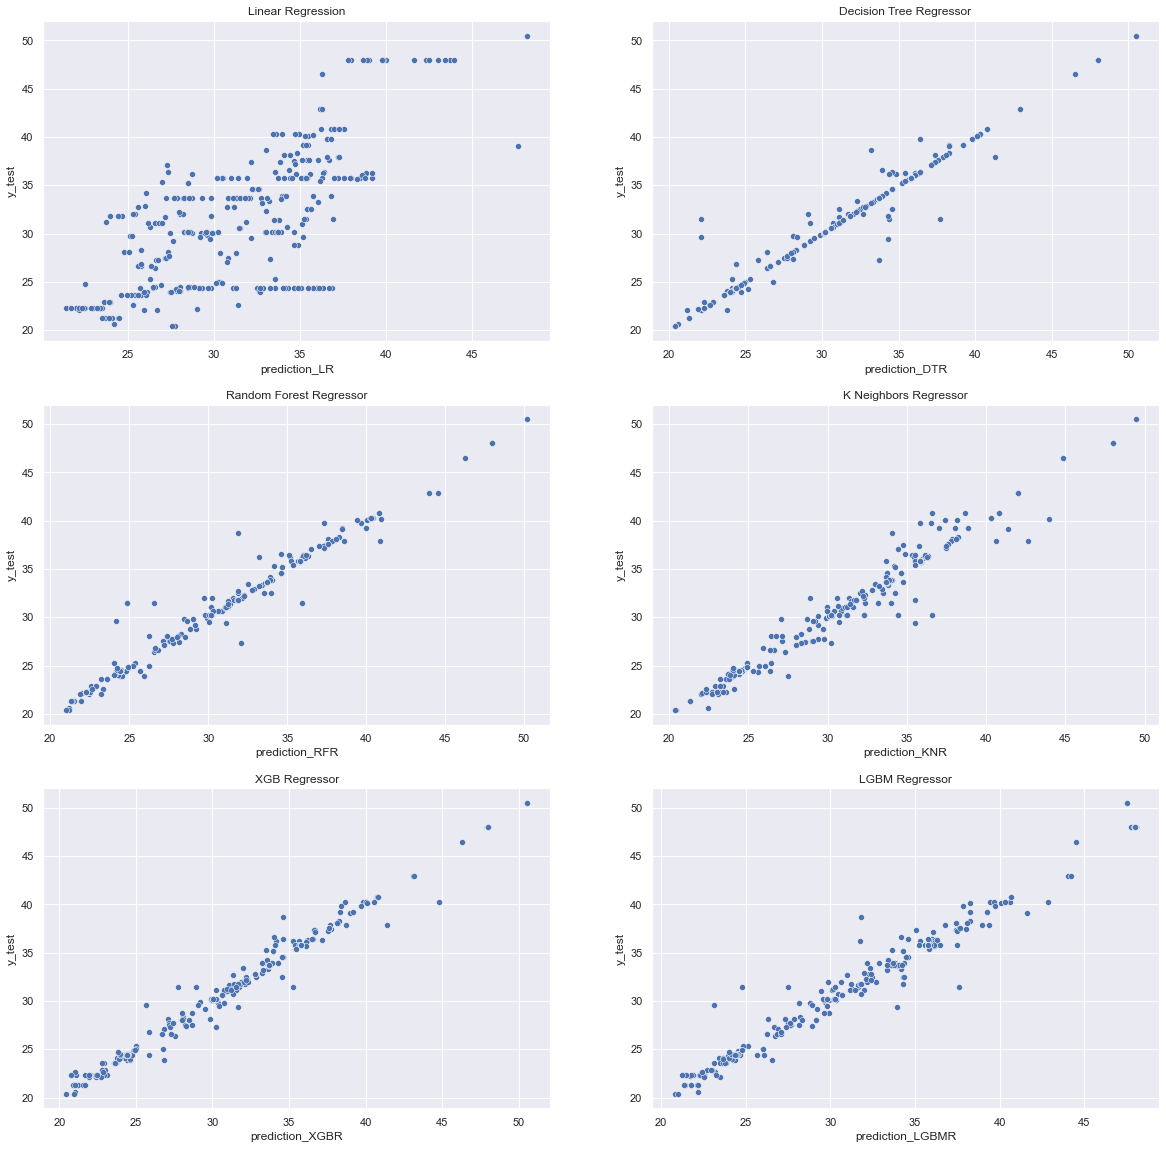

In [16]:
# Visualize prediction
algorithms = [LinearRegression, DecisionTreeRegressor, RandomForestRegressor, KNeighborsRegressor, XGBRegressor, LGBMRegressor]

prediction_LR = []
prediction_DTR = []
prediction_RFR = []
prediction_KNR = []
prediction_XGBR = []
prediction_LGBMR = []


for i in algorithms :
    model = i()
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    
    if i == LinearRegression :
        prediction_LR.append(prediction)
    elif i == DecisionTreeRegressor :
        prediction_DTR.append(prediction)
    elif i == RandomForestRegressor :
        prediction_RFR.append(prediction)
    elif i == KNeighborsRegressor :
        prediction_KNR.append(prediction)
    elif i == XGBRegressor :
        prediction_XGBR.append(prediction)
    elif i == LGBMRegressor :
        prediction_LGBMR.append(prediction)
        
# Membuat scatter plot untuk melihat sebaran data hasil prediksi dan data aktual
prediction_data = pd.DataFrame({
    'prediction_LR' : prediction_LR[0].tolist(), 
    'prediction_DTR' : prediction_DTR[0].tolist(), 
    'prediction_RFR' : prediction_RFR[0].tolist(),
    'prediction_KNR' : prediction_KNR[0].tolist(),
    'prediction_XGBR' : prediction_XGBR[0].tolist(),
    'prediction_LGBMR' : prediction_LGBMR[0].tolist(),
    'y_test' : y_test
})

fig, axes = plt.subplots(3,2,figsize=(20,20))

ax1 = sns.scatterplot(data=prediction_data, x='prediction_LR', y='y_test', ax=axes[0,0])
ax2 = sns.scatterplot(data=prediction_data, x='prediction_DTR', y='y_test', ax=axes[0,1])
ax3 = sns.scatterplot(data=prediction_data, x='prediction_RFR', y='y_test', ax=axes[1,0])
ax4 = sns.scatterplot(data=prediction_data, x='prediction_KNR', y='y_test', ax=axes[1,1])
ax5 = sns.scatterplot(data=prediction_data, x='prediction_XGBR', y='y_test', ax=axes[2,0])
ax6 = sns.scatterplot(data=prediction_data, x='prediction_LGBMR', y='y_test', ax=axes[2,1])

ax1.title.set_text('Linear Regression')
ax2.title.set_text('Decision Tree Regressor')
ax3.title.set_text('Random Forest Regressor')
ax4.title.set_text('K Neighbors Regressor')
ax5.title.set_text('XGB Regressor')
ax6.title.set_text('LGBM Regressor')

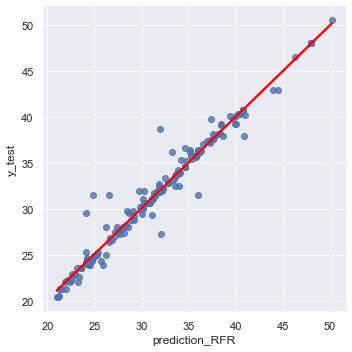

In [17]:
# Visualize top model with linear model plot
sns.lmplot(data=prediction_data, x='prediction_RFR', y='y_test', line_kws={'color': 'red'})

Based on linear model plot above, we can know that prediction result using **random forest regressor** is is very good. There are many data predict with this algorithm match with actual data.

- **Analyze machining parameters that can affect cutter temperature**

In [18]:
# Features importance using Random Forest Regressor
RFR_FI = RandomForestRegressor()
RFR_FI.fit(X_train,y_train)
feature_importance = RFR_FI.feature_importances_
feature_input = ['To', 'Spindle Speed (RPM)', 'Feed Rate (mm/min)', 'Depth of Cut (mm)', 'Time (s)']

df_FI = pd.DataFrame({
    'Features Input' : feature_input,
    'Features Importance Value' : feature_importance
})

<AxesSubplot:xlabel='Features Importance Value', ylabel='Features Input'>

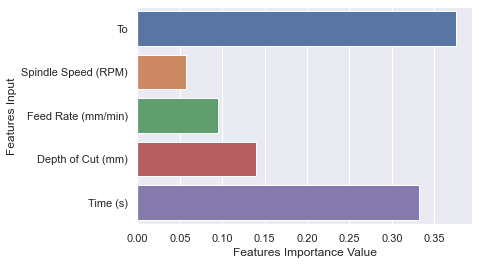

In [19]:
# Visualize features importance using bar plot
sns.barplot(data=df_FI, x='Features Importance Value', y='Features Input')

From bar plot above, **initial temperature** is most feature that affect cutter temperature, followed by **cutting time, axial depth of cut, feed rate, and spindle speed**.

- **Save model with pickle file**

In [20]:
import pickle

# Deklarasi model terpilih
model_fix = RandomForestRegressor()
model_fix.fit(X_train, y_train)

# menyimpan model dalam format file pickle
with open ('model_pickle', 'wb') as m :
    pickle.dump(model_fix, m)

## 5. Validation model with new observation data

This validation is important to make sure model not overfitting. There are 2 validation with same material with training data but different size.

- **Validation 1**

Material used is alumunium dural 5052 with size 12,3 x 4,6 x 2 cm

In [22]:
# Extract validation data 1
df_validasi_1 = pd.read_excel('DATA VALIDASI M5.xlsx')

# Separate features input and feature target
X_validasi_1 = df_validasi_1.drop(['T Output'], axis=1)
y_validasi_1 = df_validasi_1['T Output']

In [25]:
# Read pickle file
Metrics = ['Mean Absolute Error', 'Root Mean Squared Error', 'R Squared']
with open ('model_pickle', 'rb') as m :
    model_predict = pickle.load(m)
    
prediction_validasi_1 = model_predict.predict(X_validasi_1)

validation_result = []

MAE = mean_absolute_error(prediction_validasi_1, y_validasi_1)
RMSE = np.sqrt(mean_squared_error(prediction_validasi_1, y_validasi_1))
R_squared = r2_score(prediction_validasi_1, y_validasi_1)

validation_result.append(np.round(MAE, decimals=2))
validation_result.append(np.round(RMSE, decimals=2))
validation_result.append(np.round(R_squared, decimals=2))

VALIDASI_M1 = pd.DataFrame({
    'Metrics' : Metrics,
    'Evaluation Values' : validation_result
})

In [26]:
VALIDASI_M1

,Metrics,Evaluation Values
0,Mean Absolute Error,1.69
1,Root Mean Squared Error,1.87
2,R Squared,0.86


- **Validation 2**

Material used is alumunium dural 5052 with size 13,7 x 4,3 x 3 cm

In [27]:
# Extract data
df_validasi_2 = pd.read_excel('DATA VALIDASI M7.xlsx')

# Separate features input and feature target
X_validasi_2 = df_validasi_2.drop(['T Output'], axis=1)
y_validasi_2 = df_validasi_2['T Output']

In [28]:
# Read pickle file
Metrics = ['Mean Absolute Error', 'Root Mean Squared Error', 'R Squared']
with open ('model_pickle', 'rb') as m :
    model_predict = pickle.load(m)
    
prediction_validasi_2 = model_predict.predict(X_validasi_2)

validation_result = []

MAE = mean_absolute_error(prediction_validasi_2, y_validasi_2)
RMSE = np.sqrt(mean_squared_error(prediction_validasi_2, y_validasi_2))
R_squared = r2_score(prediction_validasi_2, y_validasi_2)

validation_result.append(np.round(MAE, decimals=2))
validation_result.append(np.round(RMSE, decimals=2))
validation_result.append(np.round(R_squared, decimals=2))

VALIDASI_M2 = pd.DataFrame({
    'Metrics' : Metrics,
    'Evaluation Values' : validation_result
})

In [29]:
VALIDASI_M2

,Metrics,Evaluation Values
0,Mean Absolute Error,0.78
1,Root Mean Squared Error,0.90
2,R Squared,0.89


Based on validation test with 2 different size of material, we get conclusion that **this model is good and there are no overfitting**. So, this model can use for complex system such automation in cnc milling process, etc.